<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221016_Time_Series_with_LSTM_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/08/29/time-series-with-lstm-in-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [2]:
import numpy as np
np.random.seed(7)
import pandas as pd

import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/airline-passengers.csv')

In [4]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [11]:
data.drop(columns=['Month'], inplace=True)

In [12]:
data.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [15]:
data['Passengers'] = data.Passengers.astype('float32')

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(data)

In [19]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size : len(dataset), :]
print(len(train), len(test))

96 48


In [20]:
def create_datasets(dataset, look_back=1):
    x_data, y_data = [], []
    for i in range(len(dataset) - look_back-1):
      a = dataset[i: (i+look_back), 0]
      x_data.append(a)
      y_data.append(dataset[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

In [21]:
look_back = 1
x_train, y_train = create_datasets(train, look_back)
x_test, y_test = create_datasets(test, look_back)

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [23]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.0639 - 1s/epoch - 14ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0333 - 96ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0236 - 95ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0207 - 95ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0194 - 108ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0183 - 108ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0174 - 93ms/epoch - 986us/step
Epoch 8/100
94/94 - 0s - loss: 0.0165 - 98ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0156 - 93ms/epoch - 985us/step
Epoch 10/100
94/94 - 0s - loss: 0.0148 - 101ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0138 - 91ms/epoch - 963us/step
Epoch 12/100
94/94 - 0s - loss: 0.0129 - 97ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0121 - 94ms/epoch - 1ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0112 - 100ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0103 - 95ms/epoch - 1ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0095 - 102ms/epoch - 

In [24]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [26]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [28]:
train_score = math.sqrt(metrics.mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = math.sqrt(metrics.mean_squared_error(y_test[0], test_predict[:, 0]))

In [29]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

In [30]:
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back*2)+1:len(dataset)-1, :] = test_predict

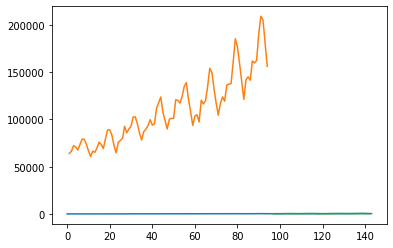

In [31]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()